In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
customers_path = '/content/Customers.csv'
products_path = '/content/Products.csv'
transactions_path = '/content/Transactions.csv'

customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)



In [3]:
customers_df.head(), products_df.head(), transactions_df.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [4]:
print("Missing data in customers:", customers_df.isnull().sum())
print("Missing data in products:", products_df.isnull().sum())
print("Missing data in transactions:", transactions_df.isnull().sum())


Missing data in customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing data in products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing data in transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


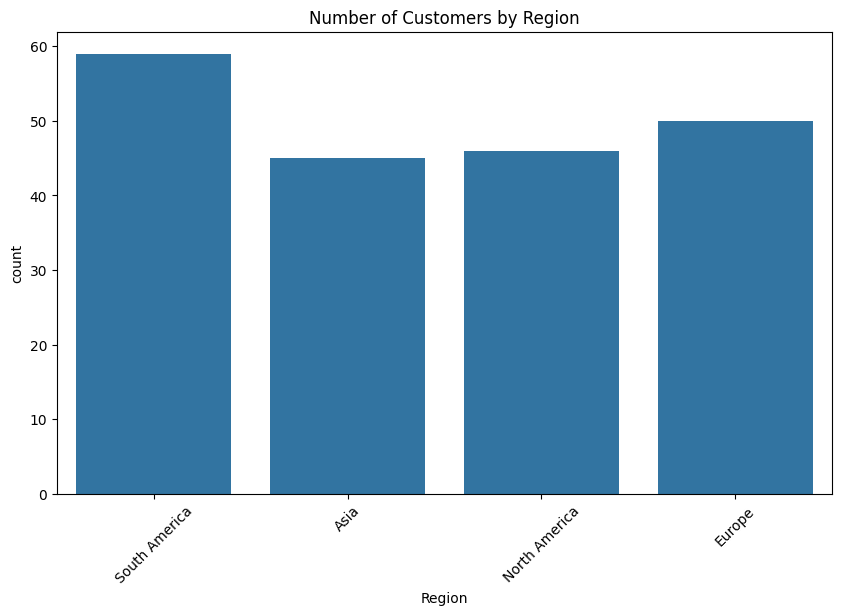

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region')
plt.title('Number of Customers by Region')
plt.xticks(rotation=45)
plt.show()


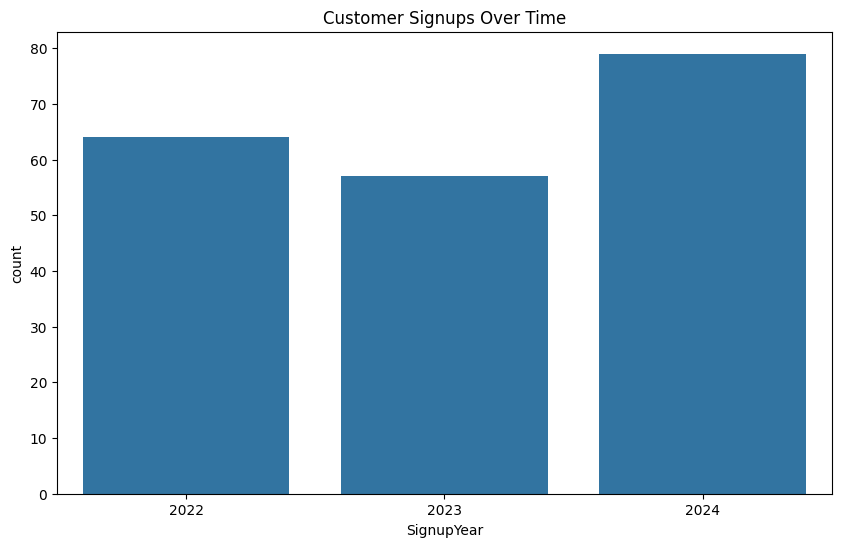

In [7]:
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='SignupYear')
plt.title('Customer Signups Over Time')
plt.show()


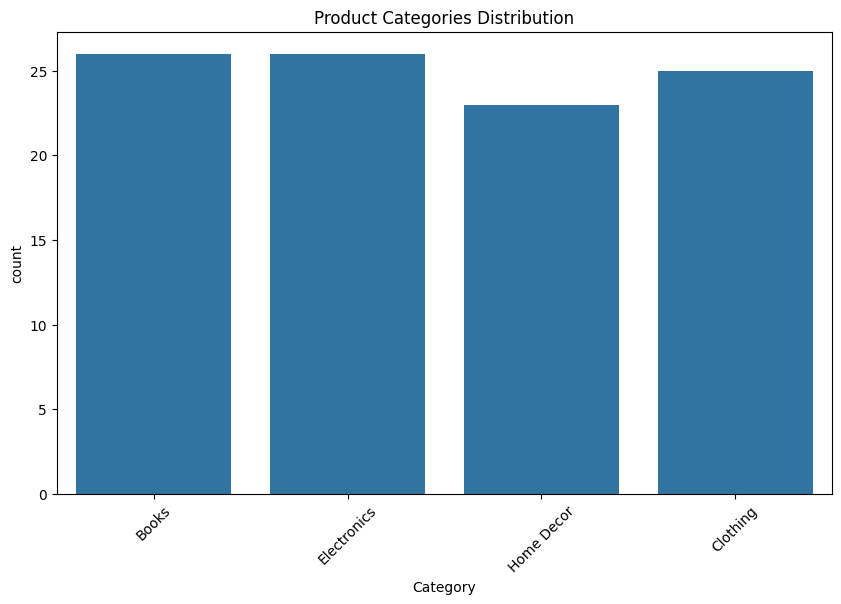

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=products_df, x='Category')
plt.title('Product Categories Distribution')
plt.xticks(rotation=45)
plt.show()


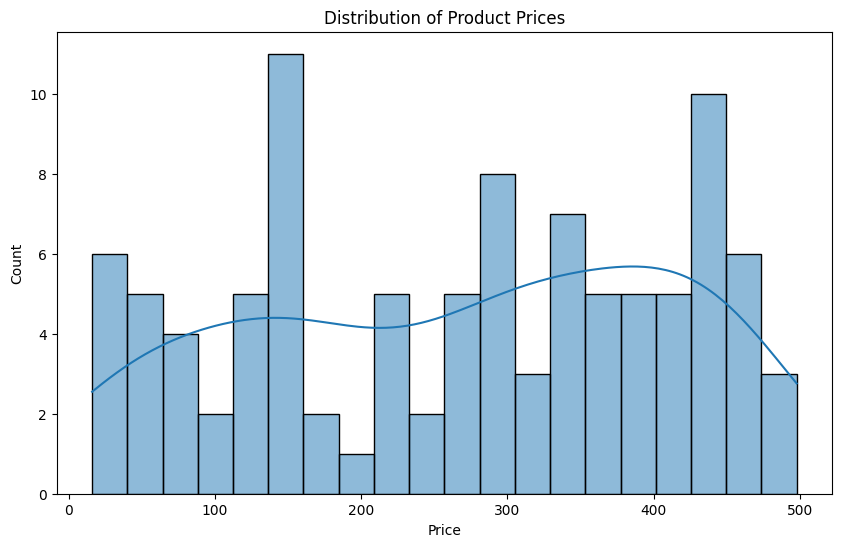

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(products_df['Price'], kde=True, bins=20)
plt.title('Distribution of Product Prices')
plt.show()


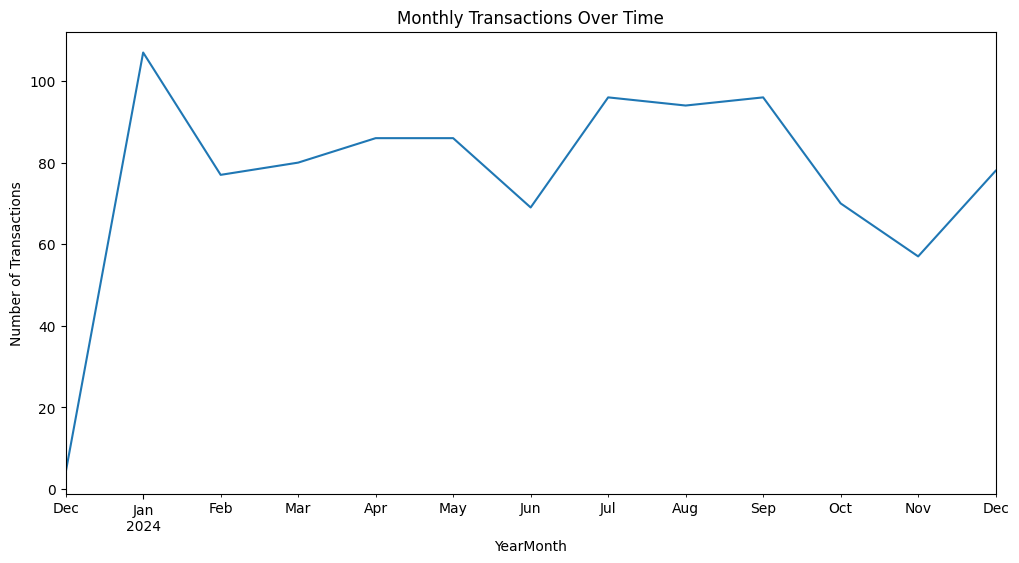

In [10]:
transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
transaction_counts = transactions_df.groupby('YearMonth').size()

plt.figure(figsize=(12, 6))
transaction_counts.plot(kind='line')
plt.title('Monthly Transactions Over Time')
plt.ylabel('Number of Transactions')
plt.show()
